# Descriptive Analyses

Intro tables to give context to the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")

participants = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-participants.csv",index_col=0)
posts = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-rumour-results.csv",index_col=0)
reshare_rates = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-reshare_rates.csv")
post_study = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-post-study-responses.csv",index_col=0)
print("Shape: {}x{}".format(*reshare_rates.shape))
reshare_rates.head()

Shape: 14x32


,user_id,consent,timeSubmitted,educationLevel,attendsProtests,politicalAffiliation,age,gender_man,gender_woman,affiliatedMovements_climate,...,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
0,-8401840221263583025,1,2021-05-24 11:29:46.900000+00:00,undergrad,False,none,31,0,1,1,...,0,0,1,Control,High,0.0,0.0,0.00,0.25,NaN
1,-8401840221263583025,1,2021-05-24 11:29:46.900000+00:00,undergrad,False,none,31,0,1,1,...,0,0,1,Control,Low,0.1,0.4,0.25,0.25,0.2
2,-6373761471430672299,1,2021-05-24 11:22:36.876000+00:00,graduateSchool,False,centreRight,40,1,0,1,...,0,0,1,Control,High,0.2,0.0,0.00,0.50,1.0
3,-6373761471430672299,1,2021-05-24 11:22:36.876000+00:00,graduateSchool,False,centreRight,40,1,0,1,...,0,0,1,Control,Low,0.0,0.2,0.00,0.00,0.0
4,-4152463232499938456,1,2021-05-24 11:22:21.880000+00:00,undergrad,False,centreLeft,33,0,1,1,...,0,0,0,Control,High,0.6,0.0,0.25,0.00,1.0


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [2]:
from tableone import TableOne
table_one = TableOne(participants.reset_index().drop(["user_id","timeSubmitted","consent"],
                                                     axis=1))
table_one

Missing     Overall
n                                                                            7
educationLevel, n (%)                     communityCollege       0    1 (14.3)
                                          graduateSchool              1 (14.3)
                                          highSchool                  1 (14.3)
                                          undergrad                   4 (57.1)
attendsProtests, n (%)                    False                  1    5 (83.3)
                                          True                        1 (16.7)
politicalAffiliation, n (%)               centre                 0    1 (14.3)
                                          centreLeft                  3 (42.9)
                                          centreRight                 1 (14.3)
                                          left                        1 (14.3)
                                          none                        1 (14.3)
age, mean (SD)                                                   0  33.6 (9.8)
gender_man, mean (SD)                                            0   0.4 (0.5)
gender_woman, mean (SD)                                          0   0.6 (0.5)
affiliatedMovements_climate, mean (SD)                           0   0.7 (0.5)
affiliatedMovements_freeSpeech, mean (SD)                        0   0.9 (0.4)
affiliatedMovements_gender, mean (SD)                            0   1.0 (0.0)
affiliatedMovements_indigenous, mean (SD)                        0   0.3 (0.5)
affiliatedMovements_labour, mean (SD)                            0   0.6 (0.5)
affiliatedMovements_lgbtqa, mean (SD)                            0   0.9 (0.4)
affiliatedMovements_race, mean (SD)                              0   0.9 (0.4)
affiliatedMovements_religion, mean (SD)                          0   0.1 (0.4)
affiliatedMovements_smallGov, mean (SD)                          0   0.3 (0.5)
socialMedias_None, mean (SD)                                     0   0.0 (0.0)
socialMedias_facebook, mean (SD)                                 0   0.7 (0.5)
socialMedias_instagram, mean (SD)                                0   0.9 (0.4)
socialMedias_reddit, mean (SD)                                   0   0.9 (0.4)
socialMedias_snapchat, mean (SD)                                 0   0.1 (0.4)
socialMedias_tiktok, mean (SD)                                   0   0.1 (0.4)
socialMedias_twitter, mean (SD)                                  0   0.7 (0.5)

### Experiment descriptive statistics

In [3]:
table_two = TableOne(posts.reset_index().drop(["user_id","timeSubmitted","rumour","evidence","code","id"],
                                              axis=1),
                     groupby=["condition","evidence"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                              Missing       Overall       control     treatment P-Value
n                                                               392           224           168        
secondsTaken, mean (SD)                             0  113.2 (15.9)  111.5 (19.0)  115.5 (10.1)   0.008
warning, mean (SD)                                  0     0.1 (0.3)     0.0 (0.0)     0.3 (0.5)  <0.001
reshared, mean (SD)                                 0     0.2 (0.4)     0.1 (0.3)     0.2 (0.4)   0.224
clickedWarning, mean (SD)                           0     0.0 (0.1)     0.0 (0.0)     0.0 (0.2)   0.008
timestamp, mean (SD)                                0   29.9 (17.6)   29.3 (17.5)   30.6 (17.6)   0.477
mockGender, n (%)         female                    0    195 (49.7)    110 (49.1)     85 (50.6)   0.850
                          male                           197 (50.3)    114 (50.9)     83 (49.4)

In [4]:
table_three = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Affirms")
table_three

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.20,0.2
Low,0.05,0.2


In [5]:
table_four = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Denies")
table_four

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.05,0.066667
Low,0.30,0.300000


In [6]:
table_five = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].mean().T
table_five

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition Control       Treatment     
evidence     High   Low      High  Low
Affirms      0.20  0.05  0.200000  0.2
Denies       0.05  0.30  0.066667  0.3

### Other Basic Questions

1. How frequently do users click on the warning?

#### How frequently do users click on the warning?

In [7]:
treat = posts[(posts["condition"]=='treatment') & posts["warning"]].reset_index()
num_treat = len(treat["user_id"].unique())
clicked_warning = treat[treat["clickedWarning"]]
num_clicked = len(clicked_warning["user_id"].unique())
print(f"{100*(num_clicked/num_treat):.2f}% ({num_clicked}/{num_treat}) of participants clicked a warning")


100.00% (3/3) of participants clicked a warning


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print(f"Credibility indicators were only clicked on {100*len(clicked_warning)/len(treat):.2f}% ({len(clicked_warning)}/{len(treat)}) of the time")

Credibility indicators were only clicked on 14.58% (7/48) of the time


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

In [9]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))
af_di = melted[melted["code"].isin(["Affirms","Denies"])]

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


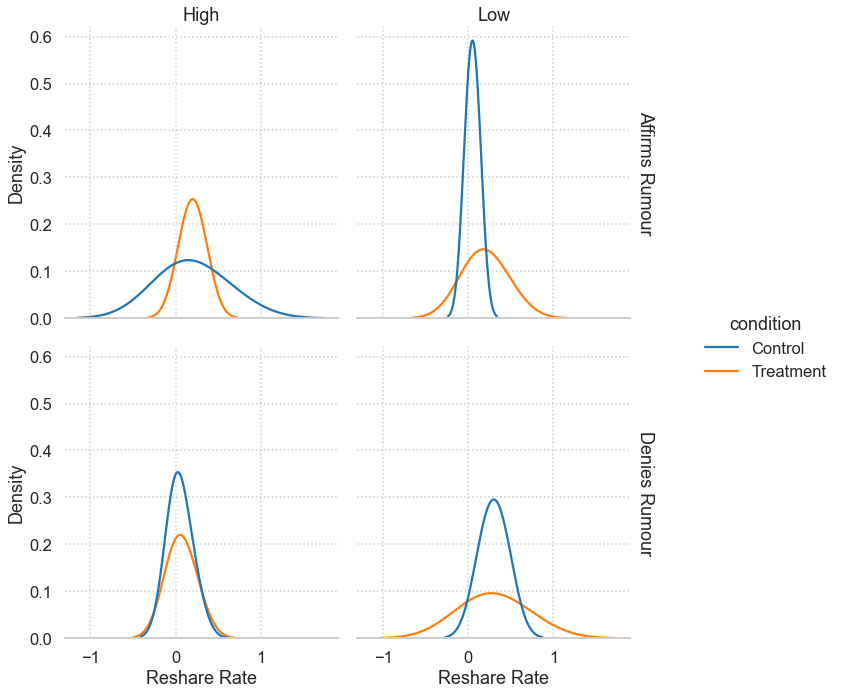

In [10]:
g = sns.displot(data=af_di, 
            x="reshared",
            hue="condition",
            col="evidence",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
sns.despine(left=True)
# g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


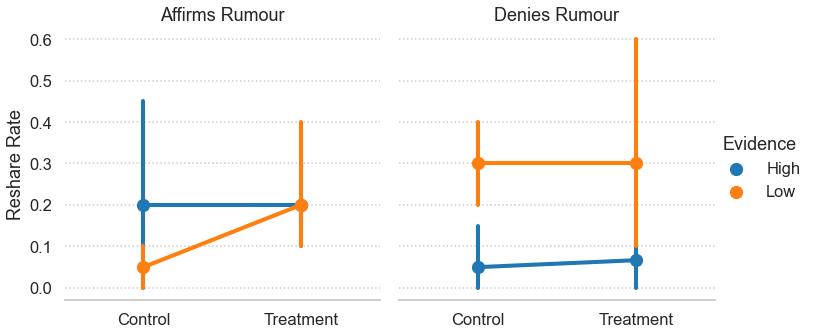

In [11]:
g = sns.catplot(data=af_di, 
            x="condition",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
g._legend.set_title("Evidence")
sns.despine(left=True)
# g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

**For seeing how to describe this plot. Look at Pennycook's Nature article.**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


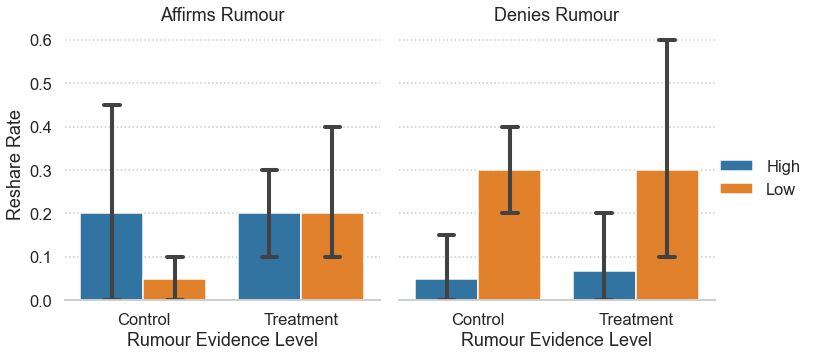

In [12]:
g = sns.catplot(data=af_di, 
            x="condition",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
# g.savefig("../figures/descriptive_analysis/reshare_rate-bar_plot.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-cb041c13f34e>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  rumour_prop = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],


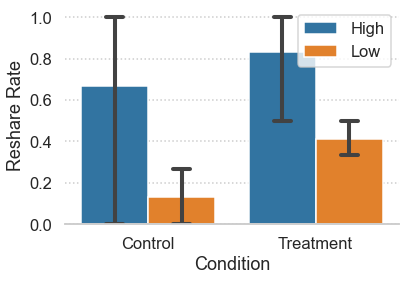

In [13]:
rumour_prop = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars="rumour_proportion",
                            var_name='code', 
                            value_name='rumour_proportion')
g = sns.barplot(data=rumour_prop, 
            x="condition",
            y="rumour_proportion",
            hue="evidence",
            capsize=.1)
g.set(ylabel="Reshare Rate",xlabel="Condition")
plt.legend(title='')

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence)",#" + (1 | user_id) + age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Affirms   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.6494
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.601
Time:                        12:34:30   Log-Likelihood:                 6.3689
No. Observations:                  14   AIC:                            -4.738
Df Residuals:                      10   BIC:                            -2.182
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.2000      0.091      2.202      0.052      -0.002       0.402
C(condition)[T.Treatment]                     8.595e-17      0.139   6.19e-16      1.000      -0.309       0.309
C(evidence)[T.Low]                              -0.1500      0.128     -1.168      0.270      -0.436       0.136
C(condition)[T.Treatment]:C(evidence)[T.Low]     0.1500      0.196      0.764      0.462      -0.287       0.587
==============================================================================
Omnibus:                        6.399   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                3.191
Skew:                           1.066   Prob(JB):                        0.203
Kurtosis:                       3.963   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/statsmodels/base/model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J


,sum_sq,df,F,PR(>F)
C(condition),NaN,1.0,NaN,NaN
C(evidence),-1.151516e-16,1.0,-2.459696e-15,1.000000
C(condition):C(evidence),1.314002e-01,1.0,2.806775e+00,0.117738
1 | user_id,1.314002e-01,1.0,2.806775e+00,0.117738
Residual,6.085998e-01,13.0,NaN,NaN


In [18]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
=======================================================================================
Model:                        MixedLM            Dependent Variable:            Affirms
No. Observations:             14                 Method:                        REML   
No. Groups:                   7                  Scale:                         0.0330 
Min. group size:              2                  Log-Likelihood:                0.3819 
Max. group size:              2                  Converged:                     Yes    
Mean group size:              2.0                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.200    0.091  2.202 0.028  0.022  0.378
C(condition)[T.Treatment]                    -0.000    0.139 -0.000 1.000 -0.272  0.272
C(evidence)[T.Low]                           -0.150    0.128 -1.168 0.243 -0.402  0.102
C(condition)[T.Treatment]:C(evidence)[T.Low]  0.150    0.196  0.764 0.445 -0.235  0.535
Group Var                                     0.000    0.087                           
=======================================================================================

"""